### **Import Data**

In [169]:
!pip install bnlearn
!pip install git+https://github.com/erdogant/bnlearn

  Cloning https://github.com/erdogant/bnlearn to /tmp/pip-req-build-_y4aywnz
  Running command git clone --filter=blob:none --quiet https://github.com/erdogant/bnlearn /tmp/pip-req-build-_y4aywnz
  Resolved https://github.com/erdogant/bnlearn to commit e58c73c0a77827409aaf4e7a196859cd9cc1cd4d
  Preparing metadata (setup.py) ... done


In [170]:
!pip install numpy==1.24.1

In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
# Import data
data = pd.read_csv("/content/drive/MyDrive/wine/wine.data")
data.columns = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
                "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue",
                "OD280/OD315 of diluted wines", "Proline"]

In [172]:
data

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [173]:
data['Alcohol'] = pd.cut(data['Alcohol'], 3, labels=[1, 2, 3])
data['Malic acid'] = pd.cut(data['Malic acid'], 3, labels=[1, 2, 3])
data['Ash'] = pd.cut(data['Ash'], 3, labels=[1, 2, 3])
data['Alcalinity of ash'] = pd.cut(data['Alcalinity of ash'], 3, labels=[1, 2, 3])
data['Magnesium'] = pd.cut(data['Magnesium'], 3, labels=[1, 2, 3])
data['Total phenols'] = pd.cut(data['Total phenols'], 3, labels=[1, 2, 3])
data['Flavanoids'] = pd.cut(data['Flavanoids'], 3, labels=[1, 2, 3])
data['Nonflavanoid phenols'] = pd.cut(data['Nonflavanoid phenols'], 3, labels=[1, 2, 3])
data['Proanthocyanins'] = pd.cut(data['Proanthocyanins'], 3, labels=[1, 2, 3])
data['Color intensity'] = pd.cut(data['Color intensity'], 3, labels=[1, 2, 3])
data['Hue'] = pd.cut(data['Hue'], 3, labels=[1, 2, 3])
data['OD280/OD315 of diluted wines'] = pd.cut(data['OD280/OD315 of diluted wines'], 3, labels=[1, 2, 3])
data['Proline'] = pd.cut(data['Proline'], 10, labels=[1, 2, 3,4,5,6,7,8,9,10])

In [174]:
data1=data.copy()
data

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,2,1,2,1,1,2,2,1,1,1,2,3,6
1,1,2,1,3,2,2,2,2,1,3,2,2,3,7
2,1,3,1,2,1,2,3,2,1,2,2,1,3,9
3,1,2,2,3,2,2,2,2,2,2,1,2,2,4
4,1,3,1,2,1,2,3,2,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,3,3,2,2,1,1,1,3,1,2,1,1,4
173,3,2,2,2,2,2,1,1,2,1,2,1,1,4
174,3,2,3,2,2,2,1,1,2,1,3,1,1,4
175,3,2,2,2,2,2,1,1,3,1,3,1,1,5


In [175]:
X=data.drop("class", axis=1)
y=data[data.columns[0]]
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
data

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,2,1,2,1,1,2,2,1,1,1,2,3,6
1,1,2,1,3,2,2,2,2,1,3,2,2,3,7
2,1,3,1,2,1,2,3,2,1,2,2,1,3,9
3,1,2,2,3,2,2,2,2,2,2,1,2,2,4
4,1,3,1,2,1,2,3,2,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,3,3,2,2,1,1,1,3,1,2,1,1,4
173,3,2,2,2,2,2,1,1,2,1,2,1,1,4
174,3,2,3,2,2,2,1,1,2,1,3,1,1,4
175,3,2,2,2,2,2,1,1,3,1,3,1,1,5


### **KNN Classifier**

In [177]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test , y_pred)

print(f'Accuracy: {accuracy:.3f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.917
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.92      0.86      0.89        14
           3       0.80      1.00      0.89         8

    accuracy                           0.92        36
   macro avg       0.91      0.93      0.91        36
weighted avg       0.93      0.92      0.92        36



In [178]:
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,2,1,2,1,1,2,2,1,1,1,2,3,6
1,2,1,3,2,2,2,2,1,3,2,2,3,7
2,3,1,2,1,2,3,2,1,2,2,1,3,9
3,2,2,3,2,2,2,2,2,2,1,2,2,4
4,3,1,2,1,2,3,2,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,3,2,2,1,1,1,3,1,2,1,1,4
173,2,2,2,2,2,1,1,2,1,2,1,1,4
174,2,3,2,2,2,1,1,2,1,3,1,1,4
175,2,2,2,2,2,1,1,3,1,3,1,1,5


In [179]:
import bnlearn as bn
model = bn.structure_learning.fit(data)

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


In [180]:
model

{'model': <pgmpy.base.DAG.DAG at 0x78742215df30>,
 'model_edges': [('class', 'OD280/OD315 of diluted wines'),
  ('class', 'Flavanoids'),
  ('class', 'Proline'),
  ('class', 'Alcohol'),
  ('class', 'Color intensity'),
  ('class', 'Malic acid'),
  ('class', 'Alcalinity of ash'),
  ('class', 'Magnesium'),
  ('class', 'Ash'),
  ('Alcalinity of ash', 'Ash'),
  ('Flavanoids', 'Total phenols'),
  ('Flavanoids', 'Proanthocyanins'),
  ('Flavanoids', 'Nonflavanoid phenols'),
  ('Hue', 'class')],
 'adjmat': target                        class  Alcohol  Malic acid    Ash  \
 source                                                            
 class                         False     True        True   True   
 Alcohol                       False    False       False  False   
 Malic acid                    False    False       False  False   
 Ash                           False    False       False  False   
 Alcalinity of ash             False    False       False   True   
 Magnesium             

### **Network A**

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/91.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


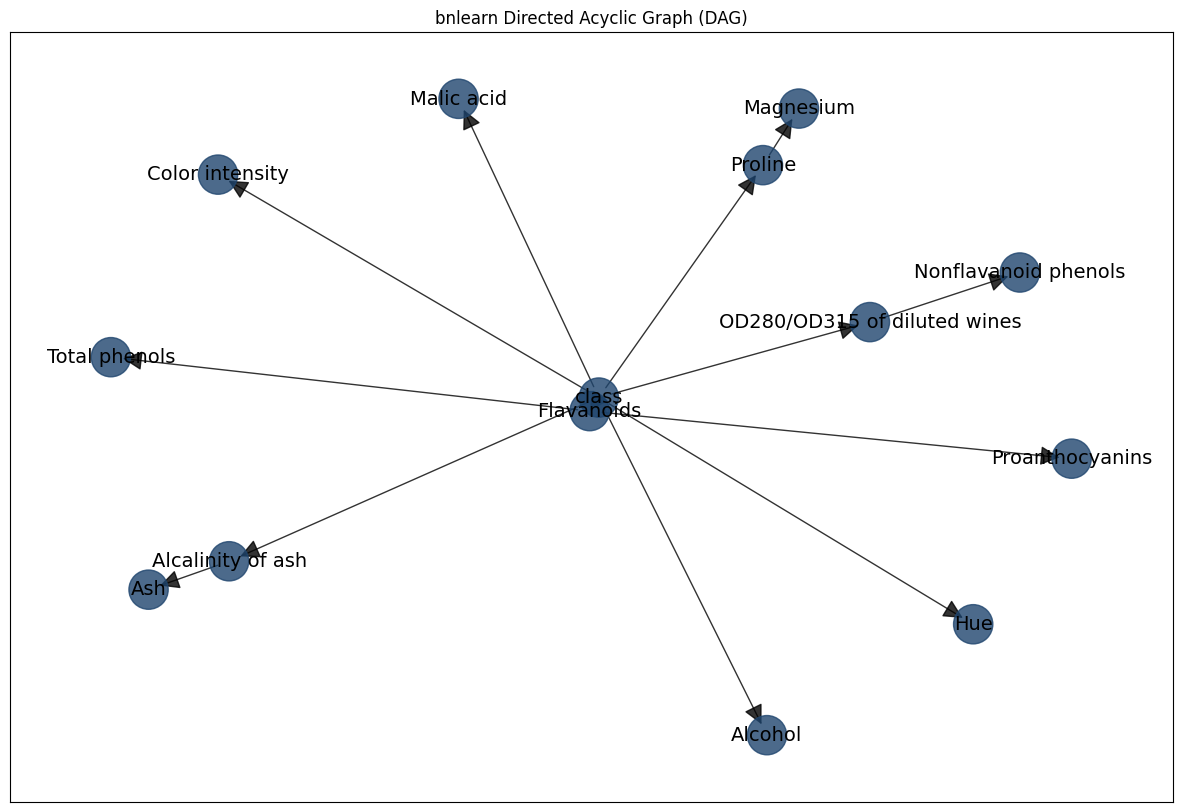

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'class': array([-0.03113377, -0.057639  ]),
  'Proline': array([0.27541882, 0.5910527 ]),
  'OD280/OD315 of diluted wines': array([0.47520454, 0.15294282]),
  'Flavanoids': array([-0.04829176, -0.09550442]),
  'Color intensity': array([-0.74238242,  0.56461717]),
  'Hue': array([ 0.66813866, -0.6904042 ]),
  'Alcohol': array([ 0.2829224, -1.       ]),
  'Malic acid': array([-0.29314392,  0.77618377]),
  'Alcalinity of ash': array([-0.72180109, -0.51460515]),
  'Magnesium': array([0.34261787, 0.74896107]),
  'Nonflavanoid phenols': array([0.75528386, 0.29137827]),
  'Total phenols': array([-0.94260656,  0.05503663]),
  'Proanthocyanins': array([ 0.85199107, -0.22820058]),
  'Ash': array([-0.87221771, -0.5938191 ])},
 'G': <networkx.classes.digraph.DiGraph at 0x787421264730>,
 'node_properties': {'class': {'node_color': '#1f456e', 'node_size': 800},
  'Proline': {'node_color': '#1f456e', 'no

In [181]:
train_data=pd.concat([X_train,y_train],axis=1)
test_data=pd.concat([X_test, y_test], axis=1)
A = bn.structure_learning.fit(train_data,methodtype='chow-liu')
bn.plot(A)

In [182]:
A = bn.parameter_learning.fit(A,train_data, methodtype="bayes")
CPDs=bn.print_CPD(A)
print(CPDs)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of class:
+----------+----------+
| class(1) | 0.330704 |
+----------+----------+
| class(2) | 0.342098 |
+----------+----------+
| class(3) | 0.327198 |
+----------+----------+
[bnlearn] >CPD of Proline:
+-------------+---------------------+---------------------+---------------------+
| class       | class(1)            | class(2)            | class(3)            |
+-------------+---------------------+---------------------+---------------------+
| Proline(1)  | 0.088339222614841   | 0.1289496157130658  | 0.09196428571428572 |
+-------------+---------------------+---------------------+---------------------+
| Proline(2)  | 0.088339222614841   | 0.13407344150298894 | 0.11875000000000001 |
+-------------+---------------------+---------------------+---------------------+
| Proline(3)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [183]:
predictions = bn.predict(A,X_test,variables=["class"])
accuracy=accuracy_score(y_test,predictions["class"])
print(f"\nAccuracy: {accuracy:.3f}")

[bnlearn]> Remaining columns for inference: 13


100%|██████████| 36/36 [00:00<00:00, 161.01it/s]


Accuracy: 0.833


### **Pruning**

In [184]:
data_new=train_data.drop(['Magnesium','Proline','Ash'],axis=1)

In [185]:
data_new

,Alcohol,Malic acid,Alcalinity of ash,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,class
156,2,2,3,1,1,3,1,2,1,1,3
136,2,3,3,1,1,3,1,1,1,1,3
98,1,2,2,2,2,2,3,1,3,2,2
158,2,1,2,2,1,3,2,3,1,1,3
38,3,2,1,3,2,1,2,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...
71,2,1,3,1,1,1,1,1,2,2,2
106,2,1,2,1,1,2,2,1,1,2,2
14,3,1,2,2,2,1,1,2,2,2,1
92,1,2,2,2,2,1,2,1,2,3,2


[bnlearn] >Warning: Computing DAG with 11 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


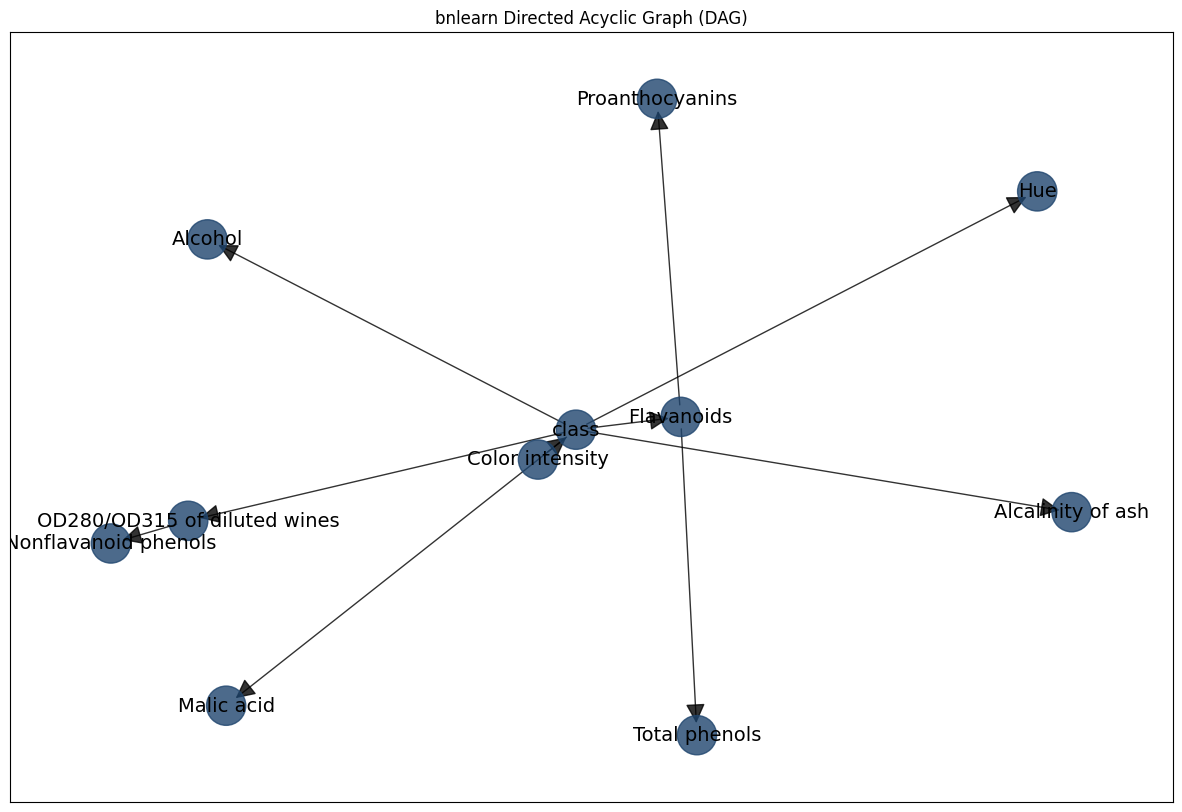

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Alcohol': array([-0.57933546,  0.58941473]),
  'Malic acid': array([-0.54719568, -0.77263518]),
  'Alcalinity of ash': array([ 0.90573176, -0.20731143]),
  'Total phenols': array([ 0.26185895, -0.85872889]),
  'Flavanoids': array([0.23389954, 0.07103838]),
  'Nonflavanoid phenols': array([-0.74528135, -0.2987911 ]),
  'Proanthocyanins': array([0.19339203, 1.        ]),
  'Color intensity': array([-0.01126149, -0.05363427]),
  'Hue': array([0.84660137, 0.72963624]),
  'OD280/OD315 of diluted wines': array([-0.61239679, -0.2325628 ]),
  'class': array([0.05398712, 0.03357434])},
 'G': <networkx.classes.digraph.DiGraph at 0x787421a3b310>,
 'node_properties': {'Alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'Malic acid': {'node_color': '#1f456e', 'node_size': 800},
  'Alcalinity of ash': {'node_color': '#1f456e', 'node_size': 800},
  'Total phenols': {'node_color': '#1f456e', 'node_

In [186]:
B = bn.structure_learning.fit(data_new)
bn.plot(B)

In [187]:
B=bn.parameter_learning.fit(B,data_new, methodtype="bayes")
CPDs_b=bn.print_CPD(B)
print(CPDs_b)

Streaming output truncated to the last 5000 lines.
(Proanthocyanins ⟂ OD280/OD315 of diluted wines, Hue, Alcalinity of ash, Nonflavanoid phenols, Alcohol | Flavanoids, Color intensity, Total phenols, class, Malic acid)
(Proanthocyanins ⟂ Hue, class, OD280/OD315 of diluted wines, Nonflavanoid phenols, Alcohol | Flavanoids, Color intensity, Total phenols, Alcalinity of ash, Malic acid)
(Proanthocyanins ⟂ Hue, Total phenols, OD280/OD315 of diluted wines, Nonflavanoid phenols, Alcohol | Flavanoids, Color intensity, class, Alcalinity of ash, Malic acid)
(Proanthocyanins ⟂ Malic acid, Hue, Nonflavanoid phenols, Alcohol, Color intensity | Alcalinity of ash, Flavanoids, Total phenols, class, OD280/OD315 of diluted wines)
(Proanthocyanins ⟂ Hue, Alcalinity of ash, Nonflavanoid phenols, Alcohol, Color intensity | Flavanoids, Total phenols, class, OD280/OD315 of diluted wines, Malic acid)
(Proanthocyanins ⟂ Hue, class, Nonflavanoid phenols, Alcohol, Color intensity | Alcalinity of ash, Flavanoids

In [188]:
predictions = bn.predict(B,X_test.drop(["Magnesium","Proline","Ash"],axis=1),variables=["class"])
accuracy=accuracy_score(y_test,predictions["class"])
print(f"\nAccuracy: {accuracy:.3f}")

[bnlearn]> Remaining columns for inference: 10


100%|██████████| 35/35 [00:00<00:00, 63.97it/s]


Accuracy: 0.806


[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


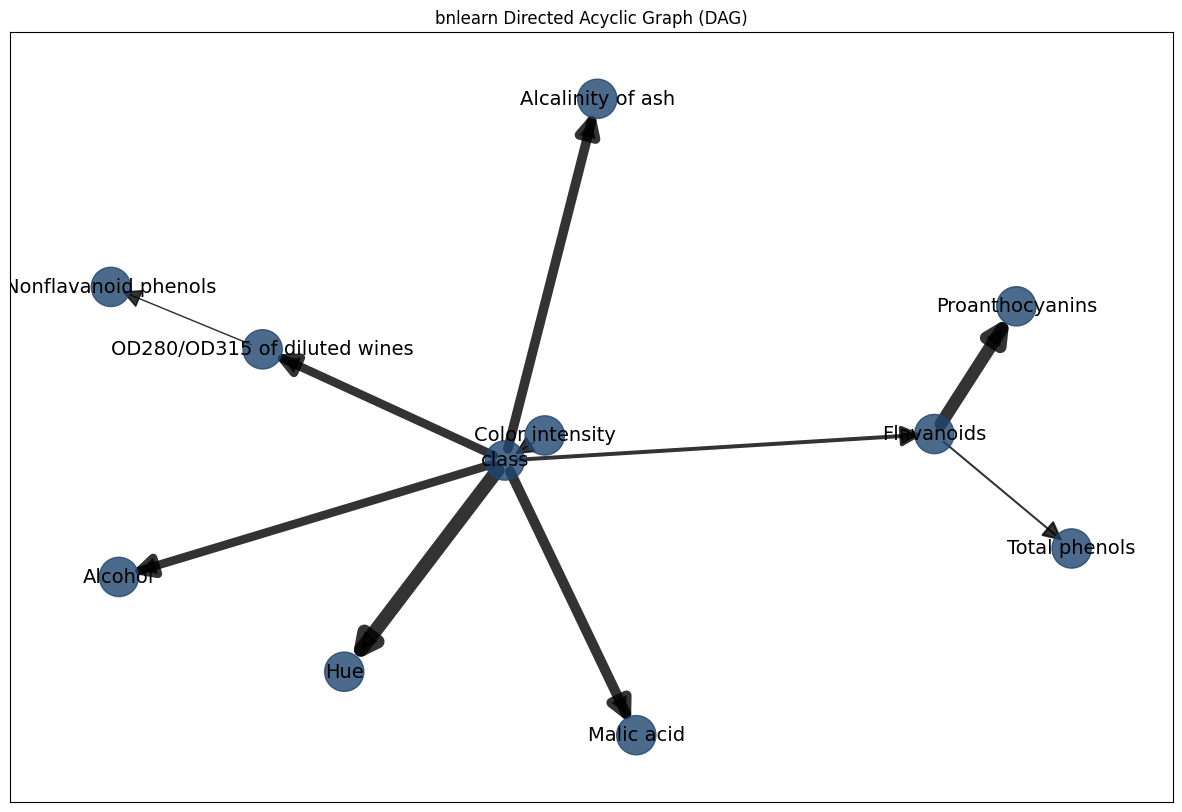

[bnlearn] >Removing columns from dataframe to make consistent with DAG [['Ash' 'Magnesium' 'Proline']]
[bnlearn] >Parameter learning> Computing parameters using [bayes]


[datazets] >WARNING> Replacing existing CPD for Flavanoids
[datazets] >WARNING> Replacing existing CPD for Total phenols
[datazets] >WARNING> Replacing existing CPD for Proanthocyanins
[datazets] >WARNING> Replacing existing CPD for Color intensity
[datazets] >WARNING> Replacing existing CPD for class
[datazets] >WARNING> Replacing existing CPD for OD280/OD315 of diluted wines
[datazets] >WARNING> Replacing existing CPD for Nonflavanoid phenols
[datazets] >WARNING> Replacing existing CPD for Alcohol
[datazets] >WARNING> Replacing existing CPD for Malic acid
[datazets] >WARNING> Replacing existing CPD for Alcalinity of ash
[datazets] >WARNING> Replacing existing CPD for Hue


Streaming output truncated to the last 5000 lines.
(Proanthocyanins ⟂ Hue, class, OD280/OD315 of diluted wines, Nonflavanoid phenols, Alcohol | Flavanoids, Color intensity, Total phenols, Alcalinity of ash, Malic acid)
(Proanthocyanins ⟂ Hue, Total phenols, OD280/OD315 of diluted wines, Nonflavanoid phenols, Alcohol | Flavanoids, Color intensity, class, Alcalinity of ash, Malic acid)
(Proanthocyanins ⟂ Malic acid, Hue, Nonflavanoid phenols, Alcohol, Color intensity | Alcalinity of ash, Flavanoids, Total phenols, class, OD280/OD315 of diluted wines)
(Proanthocyanins ⟂ Hue, Alcalinity of ash, Nonflavanoid phenols, Alcohol, Color intensity | Flavanoids, Total phenols, class, OD280/OD315 of diluted wines, Malic acid)
(Proanthocyanins ⟂ Hue, class, Nonflavanoid phenols, Alcohol, Color intensity | Alcalinity of ash, Flavanoids, Total phenols, OD280/OD315 of diluted wines, Malic acid)
(Proanthocyanins ⟂ Hue, Total phenols, Nonflavanoid phenols, Alcohol, Color intensity | Alcalinity of ash, Fl

100%|██████████| 35/35 [00:00<00:00, 59.88it/s]


Accuracy: 0.833


In [189]:
B_pruned = bn.independence_test(B, data1,prune=True)
bn.plot(B_pruned)
B_pruned=bn.parameter_learning.fit(B_pruned,data1, methodtype="bayes")
CPDs_b_pruned=bn.print_CPD(B_pruned)
print(CPDs_b_pruned)

predictions = bn.predict(B_pruned,X_test.drop(["Magnesium","Proline","Ash"],axis=1),variables=["class"])
accuracy=accuracy_score(y_test,predictions["class"])
print(f"\nAccuracy: {accuracy:.3f}")

### **Method other than pruning**

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


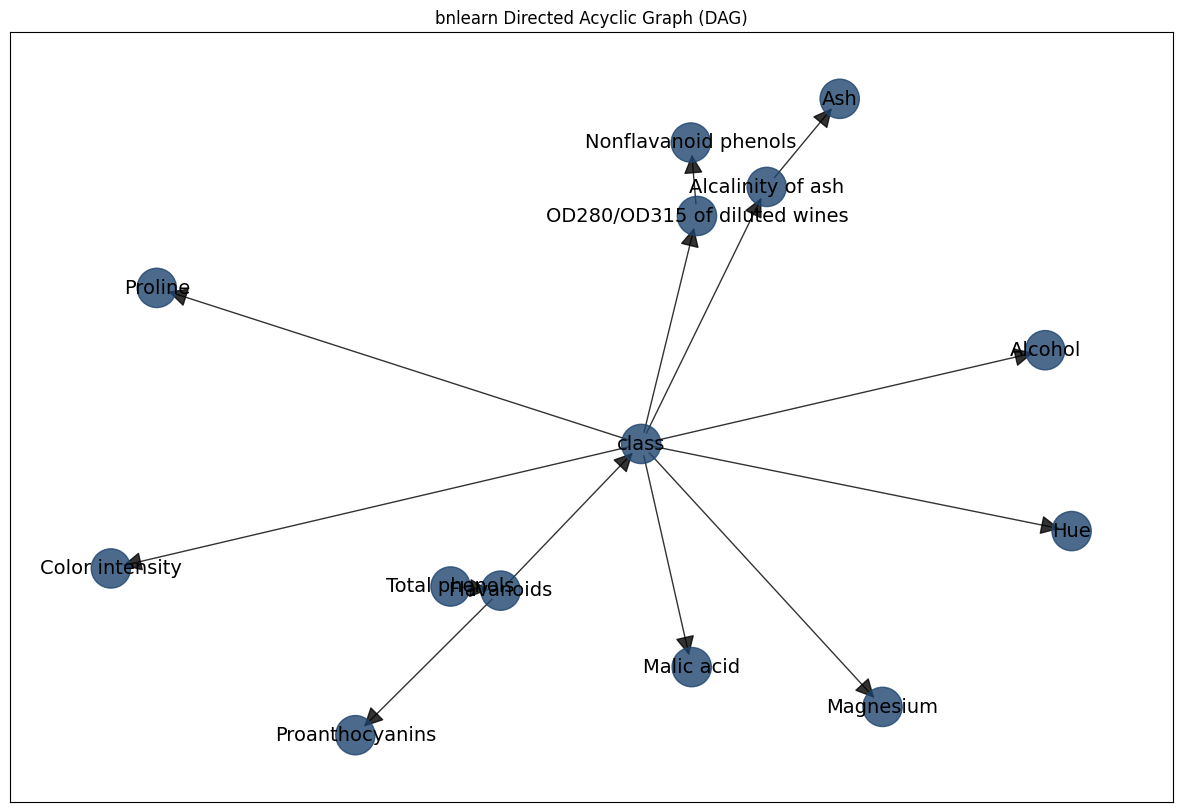

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Alcohol': array([0.78001356, 0.23348005]),
  'Malic acid': array([ 0.10660017, -0.62307997]),
  'Ash': array([0.38855192, 0.9129218 ]),
  'Alcalinity of ash': array([0.24951218, 0.67478531]),
  'Magnesium': array([ 0.47016629, -0.73060538]),
  'Total phenols': array([-0.35283402, -0.40522382]),
  'Flavanoids': array([-0.25746895, -0.41637481]),
  'Nonflavanoid phenols': array([0.10489016, 0.79474868]),
  'Proanthocyanins': array([-0.53421761, -0.8070591 ]),
  'Color intensity': array([-1.        , -0.35639107]),
  'Hue': array([ 0.83039599, -0.25541811]),
  'OD280/OD315 of diluted wines': array([0.11664447, 0.59626364]),
  'Proline': array([-0.91255019,  0.40184248]),
  'class': array([ 0.01029603, -0.01988969])},
 'G': <networkx.classes.digraph.DiGraph at 0x78741db6d9f0>,
 'node_properties': {'Alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'Malic acid': {'node_color': '#1f456e'

In [190]:
new_A = bn.structure_learning.fit(train_data, methodtype='hc')
bn.plot(new_A)

In [191]:
new_A = bn.parameter_learning.fit(new_A,train_data, methodtype="bayes")
CPDs_newA=bn.print_CPD(new_A)
print(CPDs_newA)

predictions = bn.predict(new_A,X_test,variables=["class"])
accuracy=accuracy_score(y_test,predictions["class"])
print(f"\nAccuracy: {accuracy:.3f}")

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Alcalinity of ash:
+----------------------+--------------------+---------------------+---------------------+
| class                | class(1)           | class(2)            | class(3)            |
+----------------------+--------------------+---------------------+---------------------+
| Alcalinity of ash(1) | 0.360718492343934  | 0.30259037859379445 | 0.2976190476190476  |
+----------------------+--------------------+---------------------+---------------------+
| Alcalinity of ash(2) | 0.3448174322732626 | 0.3896954170224879  | 0.3806547619047619  |
+----------------------+--------------------+---------------------+---------------------+
| Alcalinity of ash(3) | 0.2944640753828033 | 0.3077142043837176  | 0.32172619047619044 |
+----------------------+--------------------+----

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 36/36 [00:00<00:00, 49.53it/s]


Accuracy: 0.889


### **Feature Selection**

In [192]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(X, y)

selected_vars = X.columns[selector.get_support()]

X_selected = pd.DataFrame(X_selected, columns=selected_vars)
X_selected = pd.concat([X_selected,y],axis=1)


In [193]:
X_selected

,Alcohol,Malic acid,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
0,2,1,2,2,1,1,1,2,3,6,1
1,2,1,2,2,1,3,2,2,3,7,1
2,3,1,3,2,1,2,2,1,3,9,1
3,2,2,2,2,2,2,1,2,2,4,1
4,3,1,3,2,2,2,2,2,2,9,1
...,...,...,...,...,...,...,...,...,...,...,...
172,3,3,1,1,3,1,2,1,1,4,3
173,2,2,1,1,2,1,2,1,1,4,3
174,2,3,1,1,2,1,3,1,1,4,3
175,2,2,1,1,3,1,3,1,1,5,3


[bnlearn] >Warning: Computing DAG with 11 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


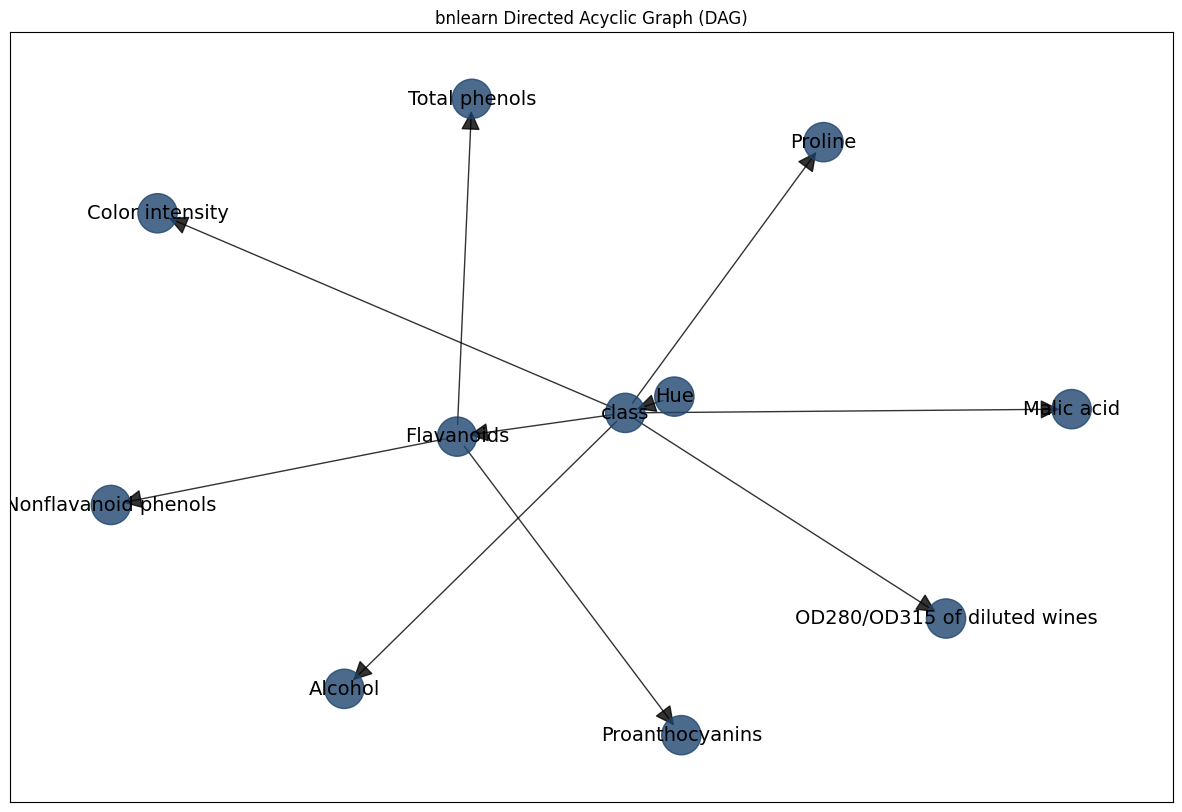

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Alcohol': array([-0.44950205, -0.81795599]),
  'Malic acid': array([0.94638143, 0.04383874]),
  'Total phenols': array([-0.20468671,  1.        ]),
  'Flavanoids': array([-0.2331975 , -0.04081492]),
  'Nonflavanoid phenols': array([-0.89755862, -0.25147107]),
  'Proanthocyanins': array([ 0.19732762, -0.96077457]),
  'Color intensity': array([-0.80795791,  0.64735589]),
  'Hue': array([0.18390311, 0.08246643]),
  'OD280/OD315 of diluted wines': array([ 0.70536429, -0.60133439]),
  'Proline': array([0.4702444 , 0.86642032]),
  'class': array([0.08968195, 0.03226956])},
 'G': <networkx.classes.digraph.DiGraph at 0x78742c09f3a0>,
 'node_properties': {'Alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'Malic acid': {'node_color': '#1f456e', 'node_size': 800},
  'Total phenols': {'node_color': '#1f456e', 'node_size': 800},
  'Flavanoids': {'node_color': '#1f456e', 'node_size': 800},
  'N

In [194]:
C=bn.structure_learning.fit(X_selected)
bn.plot(C)

In [195]:
C=bn.parameter_learning.fit(C, X_selected, methodtype="bayes")
CPDs_C=bn.print_CPD(C)
print(CPDs_C)

Streaming output truncated to the last 5000 lines.
(Color intensity ⟂ Proline, Malic acid, Flavanoids, OD280/OD315 of diluted wines, Nonflavanoid phenols, Alcohol, Proanthocyanins | Total phenols, class, Hue)
(Color intensity ⟂ Malic acid, Proline, Total phenols, Flavanoids, Nonflavanoid phenols, Alcohol, Proanthocyanins | class, OD280/OD315 of diluted wines, Hue)
(Color intensity ⟂ Proline, Total phenols, Flavanoids, OD280/OD315 of diluted wines, Nonflavanoid phenols, Alcohol, Proanthocyanins | class, Malic acid, Hue)
(Color intensity ⟂ Proanthocyanins, Total phenols | Flavanoids, Nonflavanoid phenols, Alcohol)
(Color intensity ⟂ Total phenols | Flavanoids, Nonflavanoid phenols, Proanthocyanins)
(Color intensity ⟂ Proanthocyanins, Total phenols | Flavanoids, Nonflavanoid phenols, Proline)
(Color intensity ⟂ Proanthocyanins | Flavanoids, Nonflavanoid phenols, Total phenols)
(Color intensity ⟂ Proline, Hue, Total phenols, OD280/OD315 of diluted wines, Malic acid, Alcohol, Proanthocyanin

In [196]:
predictions = bn.predict(C,X_test.drop(["Ash","Alcalinity of ash","Magnesium"],axis=1),variables=["class"])
accuracy=accuracy_score(y_test,predictions["class"])
print(f"\nAccuracy: {accuracy:.3f}")

[bnlearn]> Remaining columns for inference: 10


100%|██████████| 36/36 [00:00<00:00, 87.10it/s]


Accuracy: 0.861


### **Inferences**

In [202]:
q1=bn.inference.fit(A,variables=['class'], evidence={"Alcohol":2	,"Total phenols":	3,"OD280/OD315 of diluted wines":	3, "Color intensity":1})
print(q1)
q2=bn.inference.fit(A,variables=['class'], evidence={"Alcohol":3	,"Total phenols":	1,"OD280/OD315 of diluted wines":	2, "Color intensity":2})
print(q2)
q3=bn.inference.fit(A,variables=['class'], evidence={"Alcohol":1	,"Total phenols":	1,"OD280/OD315 of diluted wines":	1, "Color intensity":3})
print(q3)
q4=bn.inference.fit(A,variables=['class'], evidence={"Alcohol":2	,"Total phenols":	2,"OD280/OD315 of diluted wines":	2, "Color intensity":1})
print(q4)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   class |        p |
+====+=========+==========+
|  0 |       1 | 0.332589 |
+----+---------+----------+
|  1 |       2 | 0.401881 |
+----+---------+----------+
|  2 |       3 | 0.26553  |
+----+---------+----------+
+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(1) |       0.3326 |
+----------+--------------+
| class(2) |       0.4019 |
+----------+--------------+
| class(3) |       0.2655 |
+----------+--------------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   class |        p |
+====+=========+==========+
|  0 |       1 | 0.402021 |
+----+---------+----------+
|  1 |       2 | 0.283386 |
+----+---------+----------+
|  2 |       3 | 0.314592 |


In [203]:
q1=bn.inference.fit(B,variables=['class'], evidence={"Alcohol":2	,"Total phenols":	3,"OD280/OD315 of diluted wines":	3, "Color intensity":1})
print(q1)
q2=bn.inference.fit(B,variables=['class'], evidence={"Alcohol":3	,"Total phenols":	1,"OD280/OD315 of diluted wines":	2, "Color intensity":2})
print(q2)
q3=bn.inference.fit(B,variables=['class'], evidence={"Alcohol":1	,"Total phenols":	1,"OD280/OD315 of diluted wines":	1, "Color intensity":3})
print(q3)
q4=bn.inference.fit(B,variables=['class'], evidence={"Alcohol":2	,"Total phenols":	2,"OD280/OD315 of diluted wines":	2, "Color intensity":1})
print(q4)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   class |        p |
+====+=========+==========+
|  0 |       1 | 0.332589 |
+----+---------+----------+
|  1 |       2 | 0.401881 |
+----+---------+----------+
|  2 |       3 | 0.26553  |
+----+---------+----------+
+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(1) |       0.3326 |
+----------+--------------+
| class(2) |       0.4019 |
+----------+--------------+
| class(3) |       0.2655 |
+----------+--------------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   class |        p |
+====+=========+==========+
|  0 |       1 | 0.402021 |
+----+---------+----------+
|  1 |       2 | 0.283386 |
+----+---------+----------+
|  2 |       3 | 0.314592 |


In [204]:
q1=bn.inference.fit(new_A,variables=['class'], evidence={"Alcohol":2	,"Total phenols":	3,"OD280/OD315 of diluted wines":	3, "Color intensity":1})
print(q1)
q2=bn.inference.fit(new_A,variables=['class'], evidence={"Alcohol":3	,"Total phenols":	1,"OD280/OD315 of diluted wines":	2, "Color intensity":2})
print(q2)
q3=bn.inference.fit(new_A,variables=['class'], evidence={"Alcohol":1	,"Total phenols":	1,"OD280/OD315 of diluted wines":	1, "Color intensity":3})
print(q3)
q4=bn.inference.fit(new_A,variables=['class'], evidence={"Alcohol":2	,"Total phenols":	2,"OD280/OD315 of diluted wines":	2, "Color intensity":1})
print(q4)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   class |        p |
+====+=========+==========+
|  0 |       1 | 0.332589 |
+----+---------+----------+
|  1 |       2 | 0.401881 |
+----+---------+----------+
|  2 |       3 | 0.26553  |
+----+---------+----------+
+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(1) |       0.3326 |
+----------+--------------+
| class(2) |       0.4019 |
+----------+--------------+
| class(3) |       0.2655 |
+----------+--------------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   class |        p |
+====+=========+==========+
|  0 |       1 | 0.402021 |
+----+---------+----------+
|  1 |       2 | 0.283386 |
+----+---------+----------+
|  2 |       3 | 0.314592 |


In [205]:
q1=bn.inference.fit(B_pruned,variables=['class'], evidence={"Alcohol":2	,"Total phenols":	3,"OD280/OD315 of diluted wines":	3, "Color intensity":1})
print(q1)
q2=bn.inference.fit(B_pruned,variables=['class'], evidence={"Alcohol":3	,"Total phenols":	1,"OD280/OD315 of diluted wines":	2, "Color intensity":2})
print(q2)
q3=bn.inference.fit(B_pruned,variables=['class'], evidence={"Alcohol":1	,"Total phenols":	1,"OD280/OD315 of diluted wines":	1, "Color intensity":3})
print(q3)
q4=bn.inference.fit(B_pruned,variables=['class'], evidence={"Alcohol":2	,"Total phenols":	2,"OD280/OD315 of diluted wines":	2, "Color intensity":1})
print(q4)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   class |        p |
+====+=========+==========+
|  0 |       1 | 0.327455 |
+----+---------+----------+
|  1 |       2 | 0.413314 |
+----+---------+----------+
|  2 |       3 | 0.259232 |
+----+---------+----------+
+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(1) |       0.3275 |
+----------+--------------+
| class(2) |       0.4133 |
+----------+--------------+
| class(3) |       0.2592 |
+----------+--------------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   class |        p |
+====+=========+==========+
|  0 |       1 | 0.430626 |
+----+---------+----------+
|  1 |       2 | 0.266266 |
+----+---------+----------+
|  2 |       3 | 0.303108 |


In [206]:
q1=bn.inference.fit(C,variables=['class'], evidence={"Alcohol":2	,"Total phenols":	3,"OD280/OD315 of diluted wines":	3, "Color intensity":1})
print(q1)
q2=bn.inference.fit(C,variables=['class'], evidence={"Alcohol":3	,"Total phenols":	1,"OD280/OD315 of diluted wines":	2, "Color intensity":2})
print(q2)
q3=bn.inference.fit(C,variables=['class'], evidence={"Alcohol":1	,"Total phenols":	1,"OD280/OD315 of diluted wines":	1, "Color intensity":3})
print(q3)
q4=bn.inference.fit(C,variables=['class'], evidence={"Alcohol":2	,"Total phenols":	2,"OD280/OD315 of diluted wines":	2, "Color intensity":1})
print(q4)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   class |        p |
+====+=========+==========+
|  0 |       1 | 0.327455 |
+----+---------+----------+
|  1 |       2 | 0.413314 |
+----+---------+----------+
|  2 |       3 | 0.259232 |
+----+---------+----------+
+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(1) |       0.3275 |
+----------+--------------+
| class(2) |       0.4133 |
+----------+--------------+
| class(3) |       0.2592 |
+----------+--------------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   class |        p |
+====+=========+==========+
|  0 |       1 | 0.430626 |
+----+---------+----------+
|  1 |       2 | 0.266266 |
+----+---------+----------+
|  2 |       3 | 0.303108 |
